## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [3]:
original_data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [4]:
original_data.dropna(inplace=True)
categorical_variables = ['animal_type', 'intake_condition', 'intake_type', \
                        'sex_upon_intake', 'sex_upon_outcome']
# get dummies
data_features = original_data.copy()
data_features = pd.get_dummies(data_features, columns=categorical_variables)

# set outcome_type labels
data_features['adopted'] = data_features.outcome_type.apply(lambda r: 1 if r=='Adoption' else 0)

data_features.head()

,outcome_type,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,...,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,adopted
0,Return to Owner,10.0,10.0,2017,1.0,0.588194,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,Return to Owner,7.0,7.0,2014,2.0,1.259722,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,Return to Owner,6.0,6.0,2014,3.0,1.113889,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,Transfer,10.0,10.0,2014,1.0,4.970139,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,Return to Owner,16.0,16.0,2013,1.0,0.119444,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [5]:
def split_data(data, train_ratio=0.8):
    train_data = data.sample(frac=train_ratio, random_state=200)
    test_data = data.drop(train_data.index)
    return train_data, test_data


In [6]:
df_train, df_test = split_data(data_features)
y_train = df_train['adopted']
y_test = df_test['adopted']
X_train = df_train.drop(['adopted', 'outcome_type'], axis=1)
X_test = df_test.drop(['adopted', 'outcome_type'], axis=1)
#standardize X
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [13]:
def compute_confusion_matrix(y_true, y_pred, t=0.5):
    TP = np.sum((y_true == 1) & (y_pred >= t))
    FP = np.sum((y_true == 0) & (y_pred >= t))
    FN = np.sum((y_true == 1) & (y_pred < t))
    TN = np.sum((y_true == 0) & (y_pred < t))
    return np.array([[TP, FP], [FN, TN]])


def plot_confusion_matrix(confusion_matrix):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in ["Adopted", "Not Adopted"]],
                  columns = [i for i in ["Adopted", "Not Adopted"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='g')
    # show labels
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def compute_all_score(confusion_matrix):
    TP, FP, FN, TN = confusion_matrix.ravel()
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    #also for negative case
    precision_neg = TN / (TN + FN)
    recall_neg = TN / (TN + FP)
    f1_score_neg = 2 * precision_neg * recall_neg / (precision_neg + recall_neg)
    return accuracy, precision, recall, f1_score, precision_neg, recall_neg, f1_score_neg

In [14]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [15]:
prediction_proba = logistic.predict_proba(X_test)

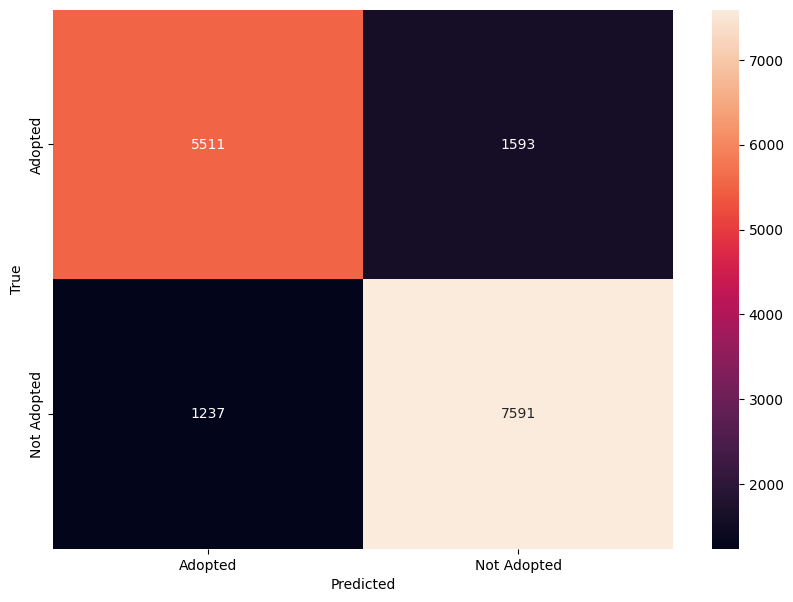

In [16]:
confusion_matrix = compute_confusion_matrix(y_test, prediction_proba[:,1])
plot_confusion_matrix(confusion_matrix)

In [17]:
# print all computed scores
accuracy, precision, recall, f1_score, precision_neg, recall_neg, f1_score_neg = compute_all_score(confusion_matrix)
print('Results for Logistic Regression')
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
# print negative scores
print('Precision (negative): ', precision_neg)
print('Recall (negative): ', recall_neg)
print('F1 Score (negative): ', f1_score_neg)




Results for Logistic Regression
Accuracy:  0.8223700728094401
Precision:  0.7757601351351351
Recall:  0.8166864256075874
F1 Score:  0.795697372220618
Precision (negative):  0.8598776619845945
Recall (negative):  0.8265461672473867
F1 Score (negative):  0.8428825227626027


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

/tmp/ipykernel_21963/1833917673.py:26: RuntimeWarning: invalid value encountered in long_scalars
  precision_neg = TN / (TN + FN)


array([[<AxesSubplot: xlabel='threshold'>,
        <AxesSubplot: xlabel='threshold'>],
       [<AxesSubplot: xlabel='threshold'>,
        <AxesSubplot: xlabel='threshold'>],
       [<AxesSubplot: xlabel='threshold'>,
        <AxesSubplot: xlabel='threshold'>],
       [<AxesSubplot: xlabel='threshold'>,
        <AxesSubplot: xlabel='threshold'>]], dtype=object)

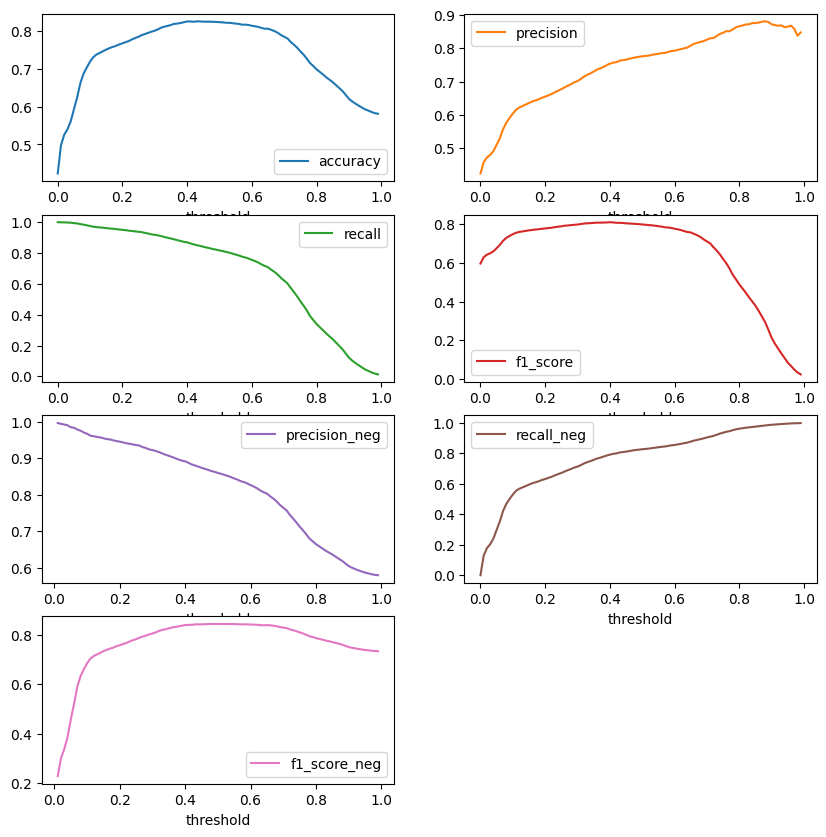

In [19]:
# vary the threshould from 0 to 1
thresholds = np.arange(0, 1, 0.01)
# compute confusion matrix for each threshold
confusion_matrices = [compute_confusion_matrix(y_test, prediction_proba[:,1], t) for t in thresholds]
# compute all scores for each threshold
all_scores = [compute_all_score(cm) for cm in confusion_matrices]
# convert to dataframe
df_scores = pd.DataFrame(all_scores, columns=['accuracy', 'precision', 'recall', 'f1_score', 'precision_neg', 'recall_neg', 'f1_score_neg'])
df_scores['threshold'] = thresholds
# plot all scores in separate plots
df_scores.plot(x='threshold', y=['accuracy', 'precision', 'recall', 'f1_score', 'precision_neg', 'recall_neg', 'f1_score_neg'], figsize=(10, 10), subplots=True, layout=(4, 2), sharex=False)


### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [20]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

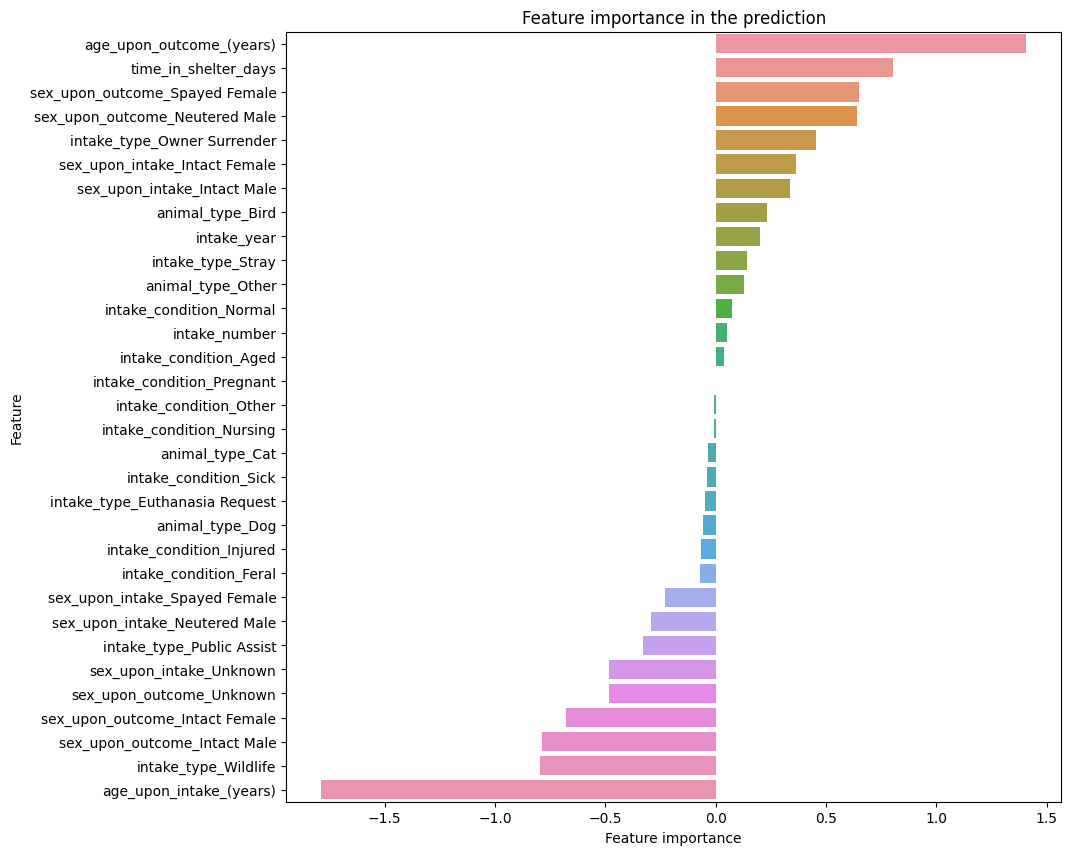

In [22]:
# Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': logistic.coef_[0]})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize=(10, 10))
sn.barplot(x='Feature importance', y='Feature', data=tmp)
plt.title('Feature importance in the prediction')
plt.show()



## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95